In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/rashida048/Some-NLP-Projects/master/movie_dataset.csv")

# Display the first few rows of the dataset
print(data.head())



   index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel sec

In [3]:
print(data.isnull().sum())

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64


In [4]:
print(data.dtypes)           

index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
director                 object
dtype: object


In [5]:
def top_movies_by_rating(df, n=5):
    df['release_year'] = pd.to_datetime(df['release_date']).dt.year
    return df.nlargest(n, 'vote_average')[['title', 'vote_average', 'release_year']]

# Example: Get top 5 movies by rating
top_movies_by_rating(data, n=5)

,title,vote_average,release_year
3519,Stiff Upper Lips,10.0,1998.0
4045,"Dancer, Texas Pop. 81",10.0,1998.0
4247,Me You and Five Bucks,10.0,2015.0
4662,Little Big Top,10.0,2006.0
3992,Sardaarji,9.5,2015.0


In [6]:
def movies_by_year(df, year):
    return df[df['release_year'] == year][['title', 'release_year', 'vote_average', 'popularity']]

# Example: Get movies released in 2010
movies_by_year(data, year=2010)

,title,release_year,vote_average,popularity
6,Tangled,2010.0,7.4,48.681969
21,Robin Hood,2010.0,6.2,37.668301
32,Alice in Wonderland,2010.0,6.4,78.530105
39,TRON: Legacy,2010.0,6.3,73.795050
42,Toy Story 3,2010.0,7.6,59.995418
...,...,...,...,...
4653,Rust,2010.0,0.0,0.399491
4655,The Christmas Bunny,2010.0,5.7,0.065103
4677,Three,2010.0,6.3,5.937602
4682,Super Hybrid,2010.0,4.6,4.009379


In [7]:
def popular_movies(df, threshold=100):
    return df[df['popularity'] > threshold][['title', 'popularity', 'vote_average', 'release_year']]

# Example: Get movies with popularity above 150
popular_movies(data, threshold=150)

,title,popularity,vote_average,release_year
0,Avatar,150.437577,7.2,2009.0
9,Batman v Superman: Dawn of Justice,155.790452,5.7,2016.0
26,Captain America: Civil War,198.372395,7.1,2016.0
28,Jurassic World,418.708552,6.5,2015.0
65,The Dark Knight,187.322927,8.2,2008.0
82,Dawn of the Planet of the Apes,243.791743,7.3,2014.0
88,Big Hero 6,203.734590,7.8,2014.0
94,Guardians of the Galaxy,481.098624,7.9,2014.0
95,Interstellar,724.247784,8.1,2014.0
96,Inception,167.583710,8.1,2010.0


In [8]:
def movies_by_genre(df, genre):
    return df[df['genres'].str.contains(genre, case=False, na=False)][['title', 'genres', 'vote_average', 'release_year']]

# Example: Get action movies
movies_by_genre(data, 'Action')

,title,genres,vote_average,release_year
0,Avatar,Action Adventure Fantasy Science Fiction,7.2,2009.0
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,6.9,2007.0
2,Spectre,Action Adventure Crime,6.3,2015.0
3,The Dark Knight Rises,Action Crime Drama Thriller,7.6,2012.0
4,John Carter,Action Adventure Science Fiction,6.1,2012.0
...,...,...,...,...
4734,Echo Dr.,Thriller Action Drama Science Fiction,5.0,2013.0
4769,The Legend of God's Gun,Action Western,0.0,2007.0
4772,Down Terrace,Drama Action Comedy,6.3,2009.0
4778,Rampage,Action Drama Crime Thriller,6.0,2009.0


In [9]:
def summary_statistics(df):
    return df.describe()

# Example: Get summary statistics for the dataset
summary_statistics(data)

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4802.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,2002.468763
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,12.414354
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,1999.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2005.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,2011.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


In [10]:
def movies_by_director(df, director):
    return df[df['director'] == director][['title', 'vote_average', 'popularity', 'release_year']]

# Example: Get movies directed by 'Christopher Nolan'
movies_by_director(data, 'Christopher Nolan')

,title,vote_average,popularity,release_year
3,The Dark Knight Rises,7.6,112.312950,2012.0
65,The Dark Knight,8.2,187.322927,2008.0
95,Interstellar,8.1,724.247784,2014.0
96,Inception,8.1,167.583710,2010.0
119,Batman Begins,7.5,115.040024,2005.0
1033,Insomnia,6.8,41.322708,2002.0
1196,The Prestige,8.0,74.440708,2006.0
3573,Memento,8.1,60.715151,2000.0


In [11]:
def movies_by_language(df, language):
    return df[df['original_language'] == language][['title', 'vote_average', 'popularity', 'release_year']]

# Example: Get movies in English
movies_by_language(data, 'en')

,title,vote_average,popularity,release_year
0,Avatar,7.2,150.437577,2009.0
1,Pirates of the Caribbean: At World's End,6.9,139.082615,2007.0
2,Spectre,6.3,107.376788,2015.0
3,The Dark Knight Rises,7.6,112.312950,2012.0
4,John Carter,6.1,43.926995,2012.0
...,...,...,...,...
4797,Cavite,7.5,0.022173,2005.0
4799,Newlyweds,5.9,0.642552,2011.0
4800,"Signed, Sealed, Delivered",7.0,1.444476,2013.0
4801,Shanghai Calling,5.7,0.857008,2012.0


In [12]:
def top_movies_by_revenue(df, n=5):
    return df.nlargest(n, 'revenue')[['title', 'revenue', 'release_year', 'vote_average']]

# Example: Get top 5 movies by revenue
top_movies_by_revenue(data, n=5)

,title,revenue,release_year,vote_average
0,Avatar,2787965087,2009.0,7.2
25,Titanic,1845034188,1997.0,7.5
16,The Avengers,1519557910,2012.0,7.4
28,Jurassic World,1513528810,2015.0,6.5
44,Furious 7,1506249360,2015.0,7.3


In [13]:
def average_rating_over_time(df):
    return df.groupby('release_year')['vote_average'].mean()

# Example: Get average rating over time
average_rating_over_time(data)

release_year
1916.0    7.400000
1925.0    7.000000
1927.0    8.000000
1929.0    6.300000
1930.0    6.100000
            ...   
2013.0    6.089177
2014.0    5.578992
2015.0    5.593981
2016.0    5.833654
2017.0    7.400000
Name: vote_average, Length: 90, dtype: float64

In [14]:
def extreme_runtime_movies(df):
    longest_runtime = df[df['runtime'] == df['runtime'].max()]
    shortest_runtime = df[df['runtime'] == df['runtime'].min()]
    return longest_runtime[['title', 'runtime', 'release_year']], shortest_runtime[['title', 'runtime', 'release_year']]

# Example: Get movies with the longest and shortest runtimes
extreme_runtime_movies(data)

(       title  runtime  release_year
 2384  Carlos    338.0        2010.0,
                                                   title  runtime  release_year
 1011                                    The Tooth Fairy      0.0        2006.0
 3112                            Blood Done Sign My Name      0.0        2010.0
 3669                               Should've Been Romeo      0.0        2012.0
 3809                                How to Fall in Love      0.0        2012.0
 3953                                         Fort McCoy      0.0        2014.0
 3992                                          Sardaarji      0.0        2015.0
 4068                                          Sharkskin      0.0        2015.0
 4118                             Hum To Mohabbat Karega      0.0        2000.0
 4205                                           N-Secure      0.0        2010.0
 4210                                Dil Jo Bhi Kahey...      0.0        2006.0
 4241                                        

In [15]:
data['overview'] = data['overview'].fillna('')

In [16]:
data['overview'] = data['overview'].apply(lambda x: x.lower())

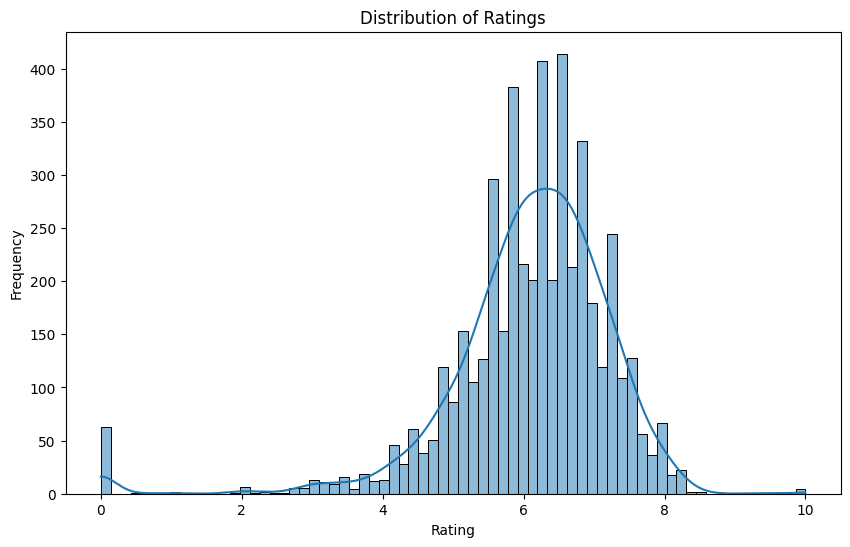

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data['vote_average'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

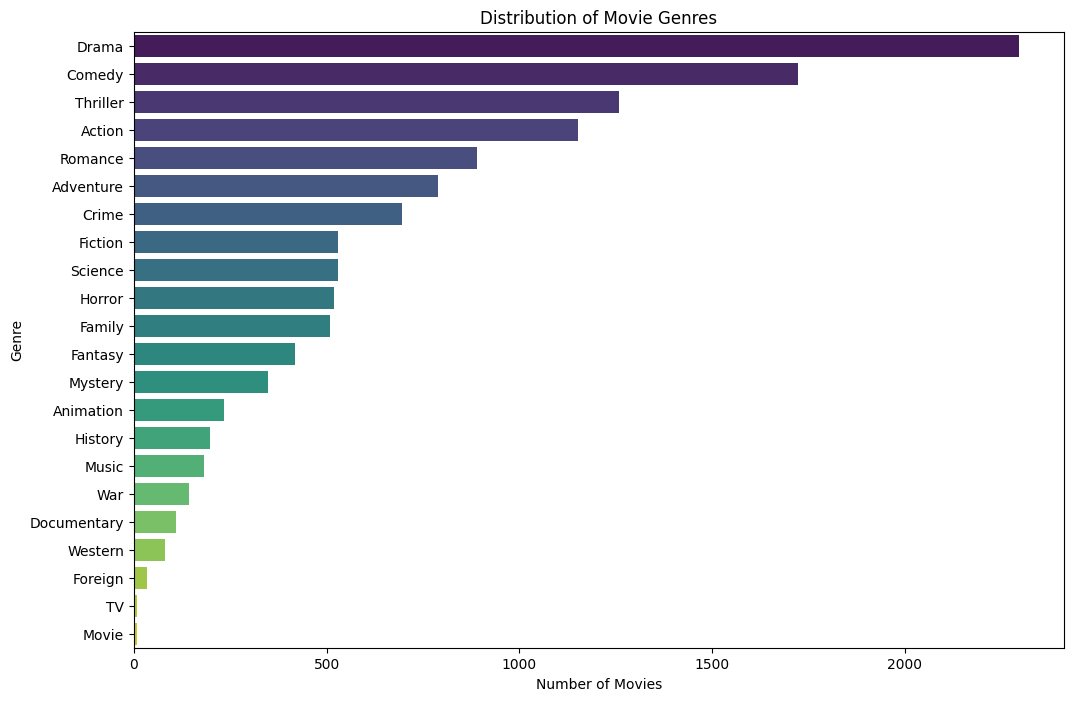

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
genres = data['genres'].str.split(' ').explode().value_counts()
sns.barplot(x=genres.values, y=genres.index, hue=genres.index, palette='viridis', legend=False)
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

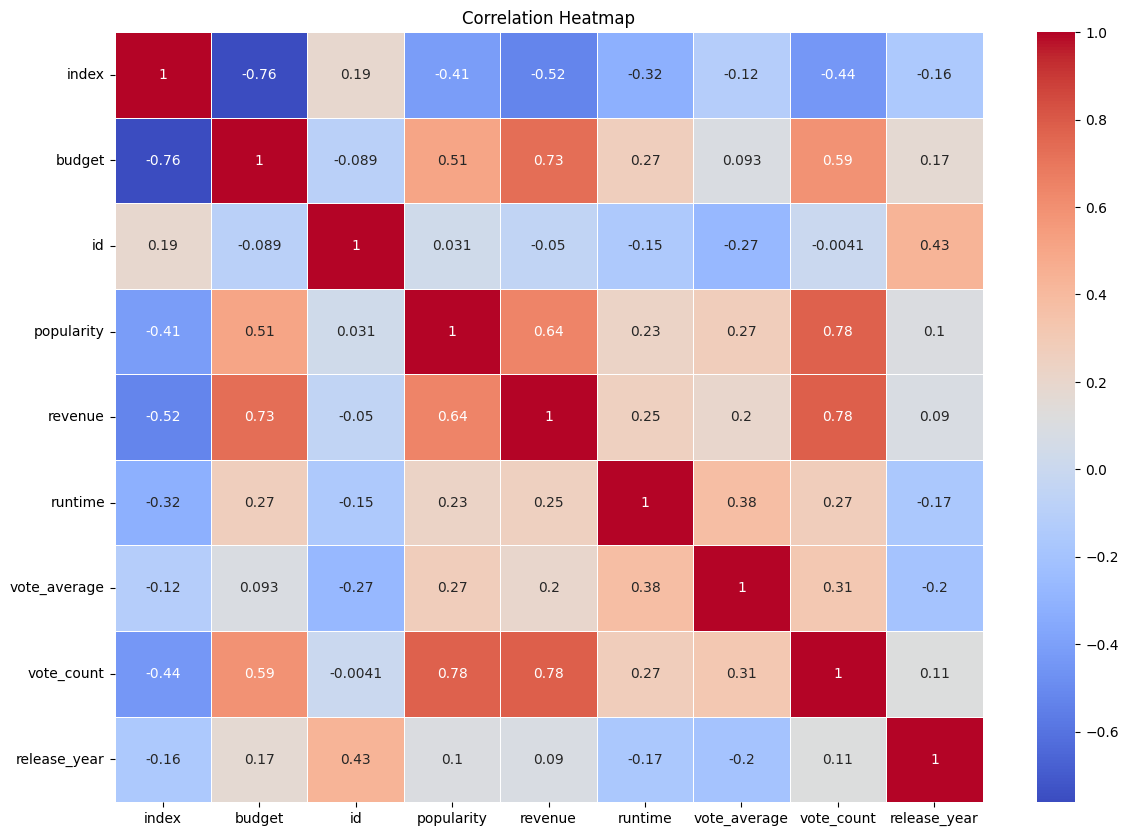

In [19]:
plt.figure(figsize=(14, 10))
numeric_data = data.select_dtypes(include='number') # Select only numeric columns
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Data Care Services\AppData\Local\Temp\ipykernel_10780\3659500059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


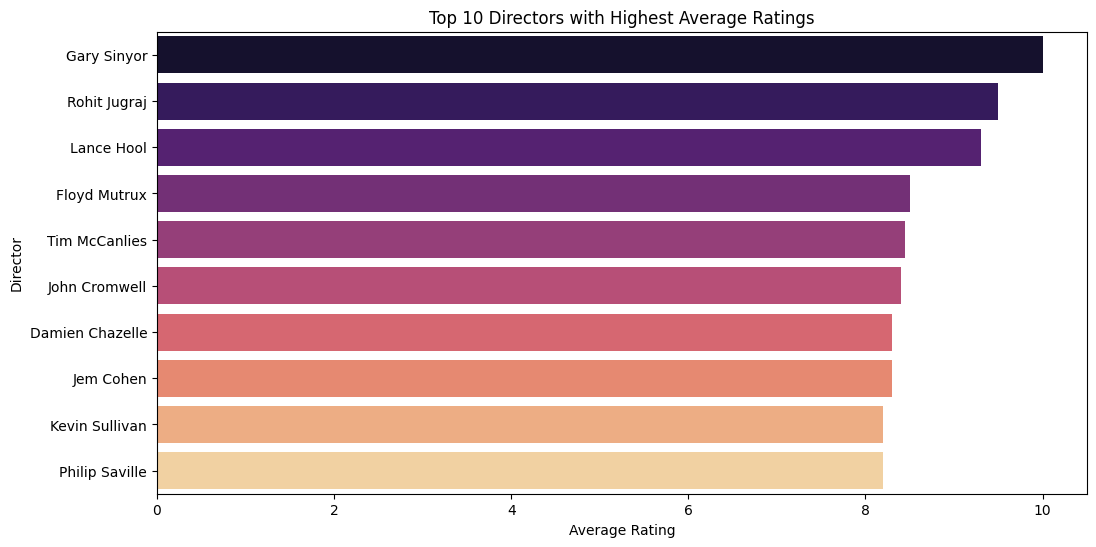

In [20]:
top_directors = data.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()


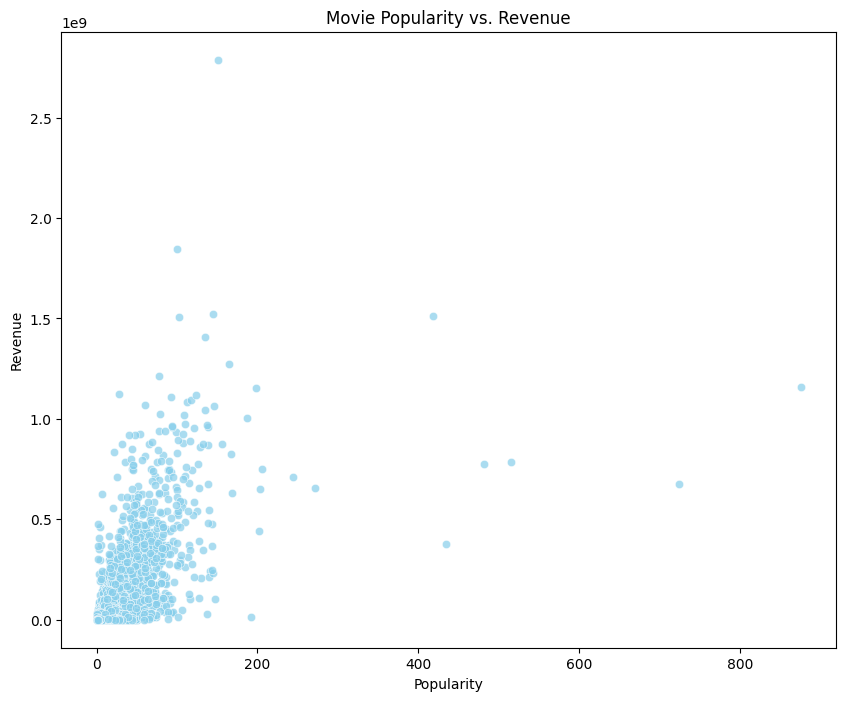

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='popularity', y='revenue', data=data, alpha=0.7, color='skyblue')
plt.title('Movie Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()


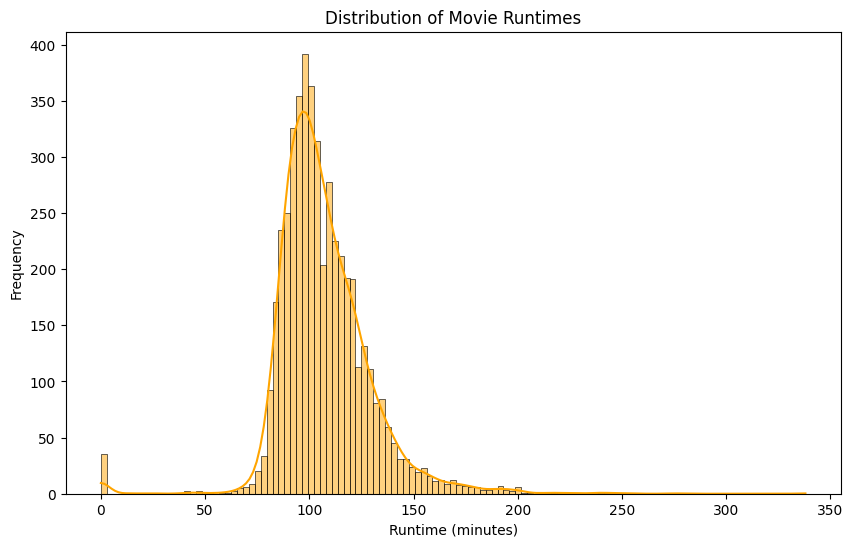

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['runtime'].dropna(), kde=True, color='orange')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


C:\Users\Data Care Services\AppData\Local\Temp\ipykernel_10780\4225552138.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='release_year', y='vote_average', data=data, ci=None, color='green')


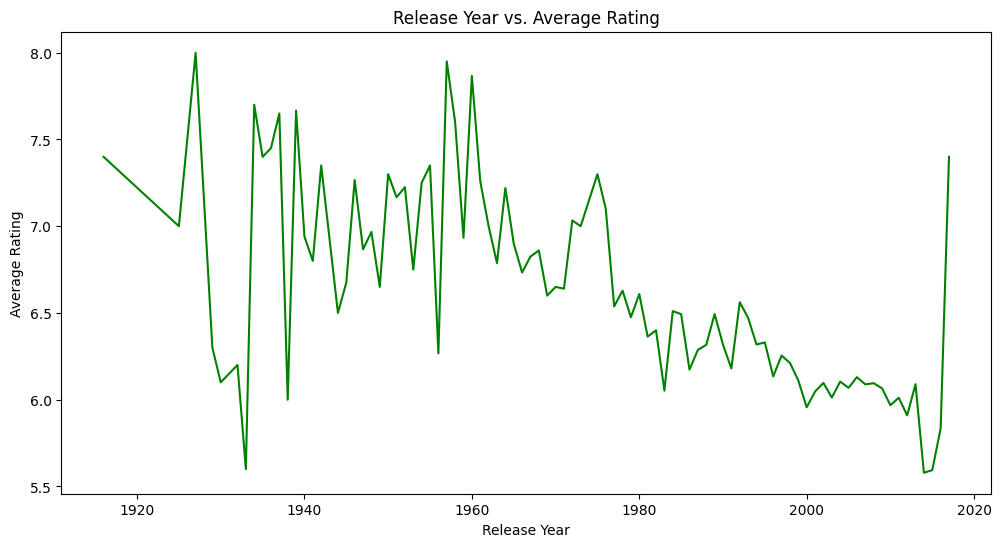

In [23]:
data['release_year'] = pd.to_datetime(data['release_date']).dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='vote_average', data=data, ci=None, color='green')
plt.title('Release Year vs. Average Rating')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()


C:\Users\Data Care Services\AppData\Local\Temp\ipykernel_10780\3207160047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_production_companies.values, y=top_production_companies.index, palette='coolwarm')


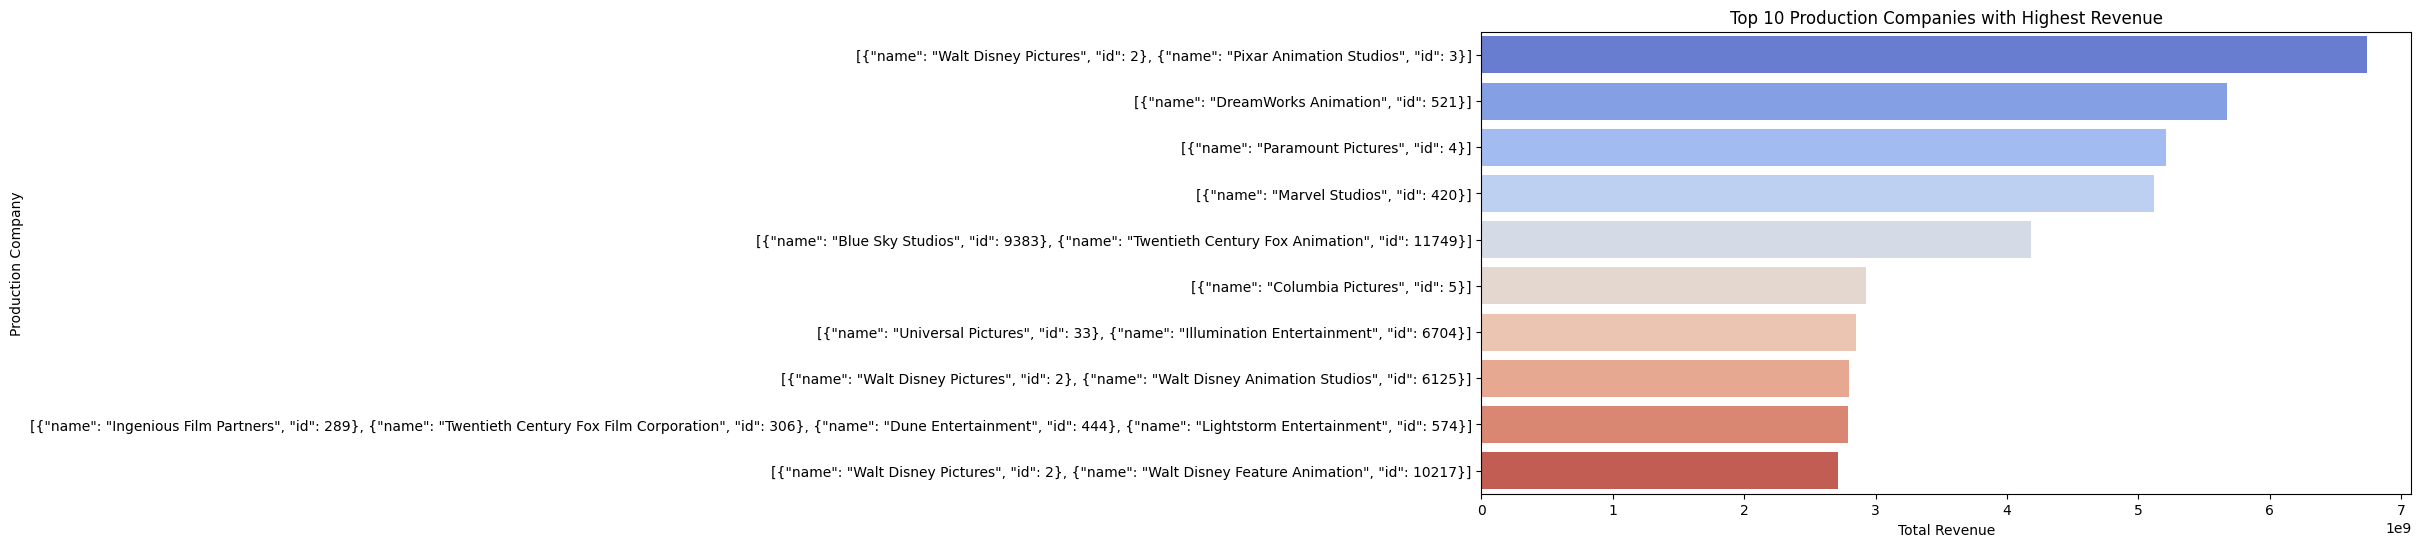

In [24]:
top_production_companies = data.groupby('production_companies')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_production_companies.values, y=top_production_companies.index, palette='coolwarm')
plt.title('Top 10 Production Companies with Highest Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Production Company')
plt.show()


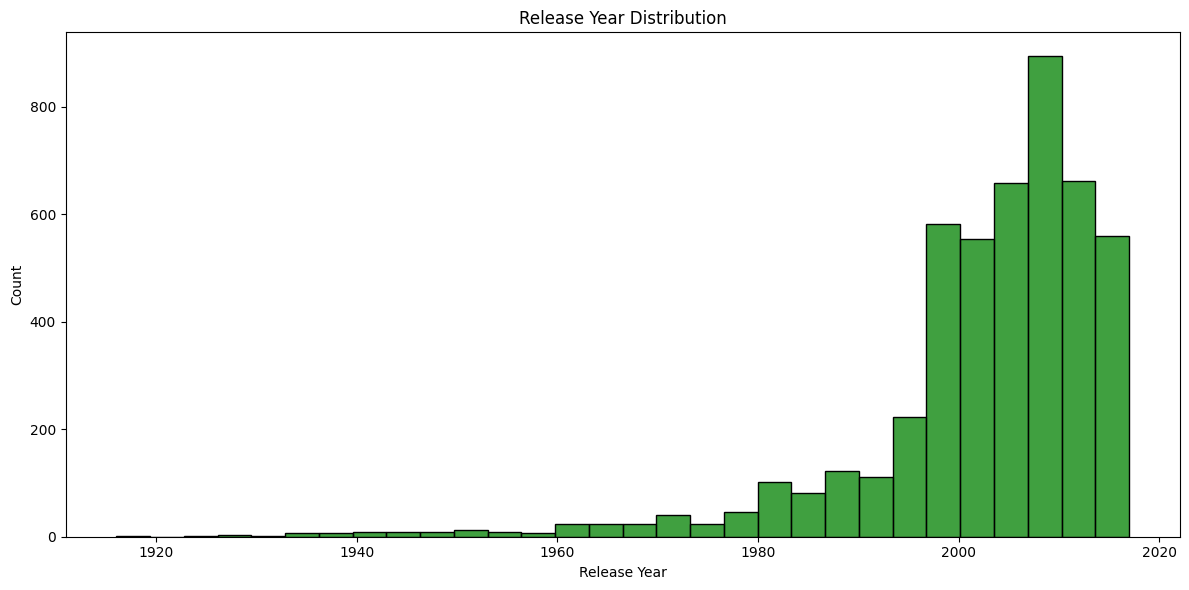

In [25]:
# Extracting release year from release_date
data['release_year'] = pd.to_datetime(data['release_date']).dt.year

# Plotting the release year distribution
plt.figure(figsize=(12,6))
sns.histplot(data['release_year'], bins=30, kde=False, color='green')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


C:\Users\Data Care Services\AppData\Local\Temp\ipykernel_10780\2309392987.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='viridis')


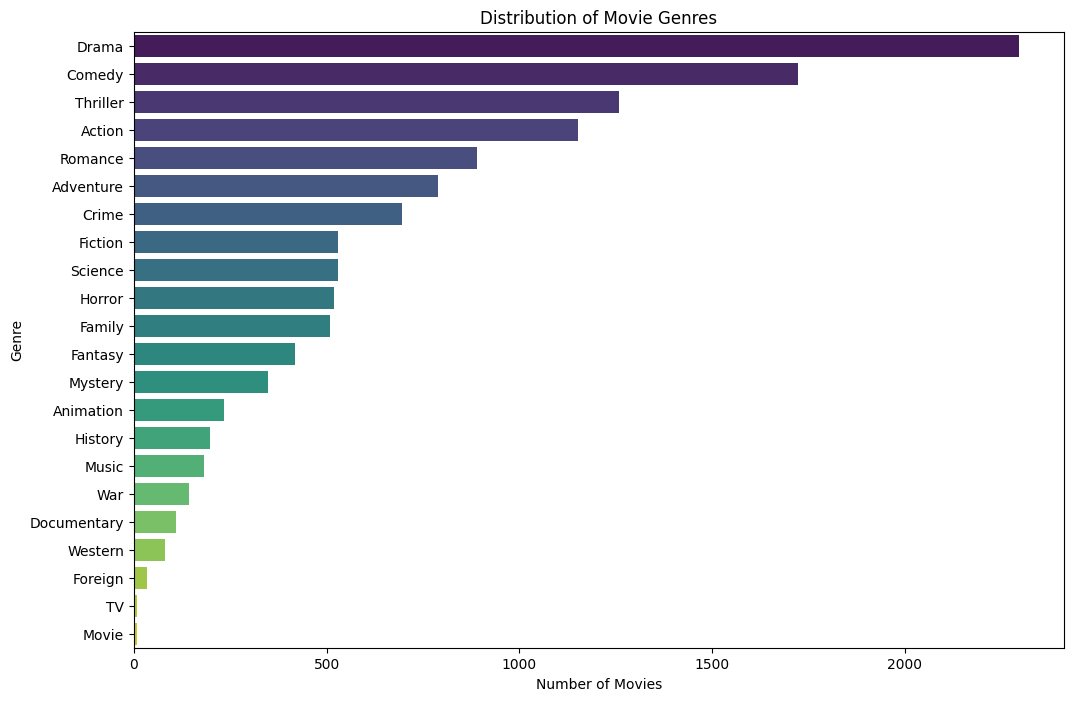

C:\Users\Data Care Services\AppData\Local\Temp\ipykernel_10780\2309392987.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='viridis')


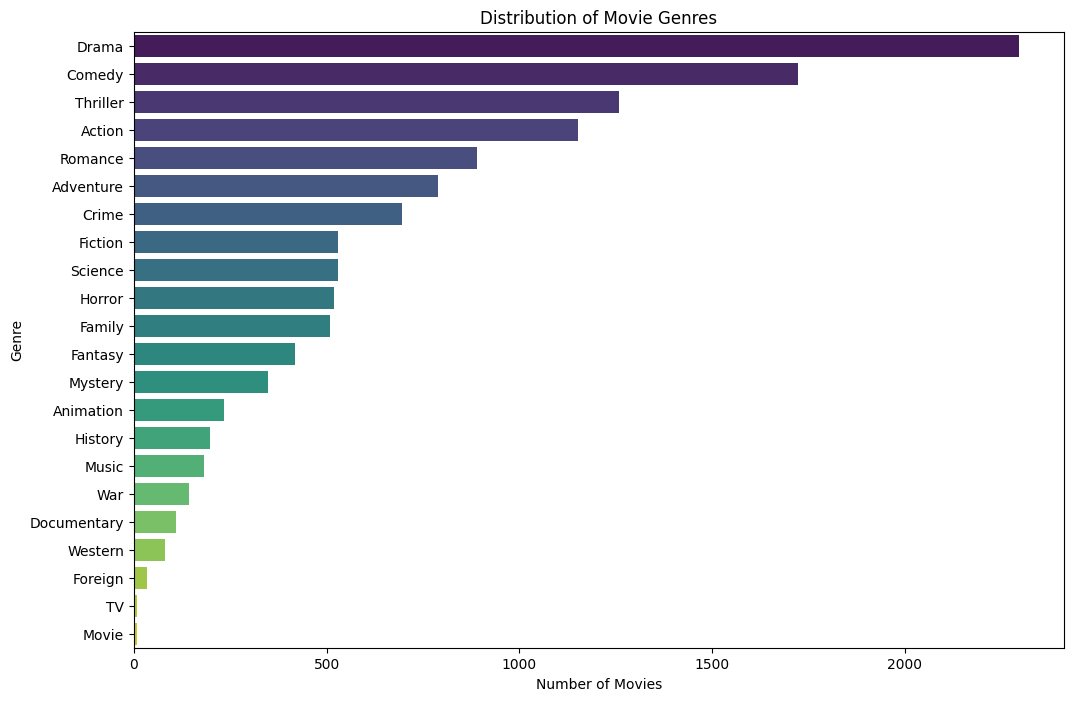

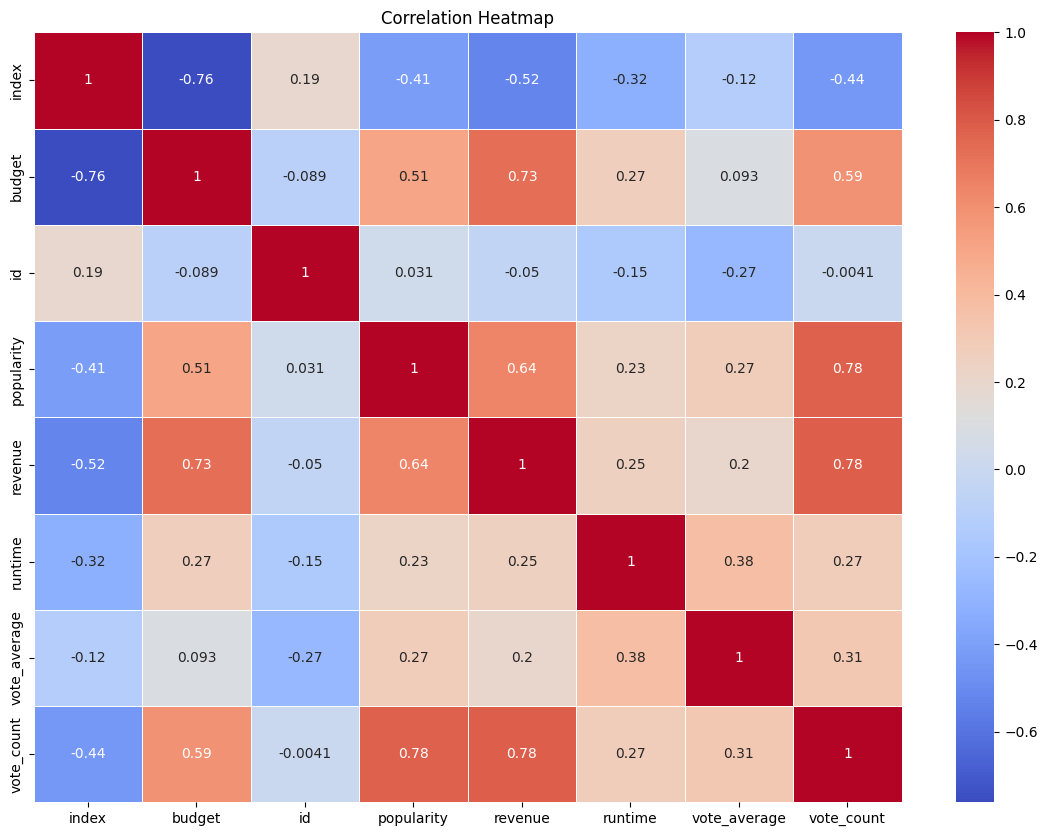

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QVBoxLayout, QWidget
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/rashida048/Some-NLP-Projects/master/movie_dataset.csv")

# Define functions for different actions
def display_genre_distribution():
    plt.figure(figsize=(12, 8))
    genres = data['genres'].str.split(' ').explode().value_counts()
    sns.barplot(x=genres.values, y=genres.index, palette='viridis')
    plt.title('Distribution of Movie Genres')
    plt.xlabel('Number of Movies')
    plt.ylabel('Genre')
    plt.show()

def display_correlation_heatmap():
    plt.figure(figsize=(14, 10))
    numeric_data = data.select_dtypes(include='number')
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

def display_summary_statistics():
    summary_stats = data.describe()
    print(summary_stats)

class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Data Science Project GUI")
        self.setGeometry(100, 100, 600, 400)

        # Create buttons
        self.button_genre_distribution = QPushButton("Genre Distribution")
        self.button_correlation_heatmap = QPushButton("Correlation Heatmap")
        self.button_summary_statistics = QPushButton("Summary Statistics")

        # Layout
        layout = QVBoxLayout()
        layout.addWidget(self.button_genre_distribution)
        layout.addWidget(self.button_correlation_heatmap)
        layout.addWidget(self.button_summary_statistics)

        widget = QWidget()
        widget.setLayout(layout)
        self.setCentralWidget(widget)

        # Connect buttons to functions
        self.button_genre_distribution.clicked.connect(display_genre_distribution)
        self.button_correlation_heatmap.clicked.connect(display_correlation_heatmap)
        self.button_summary_statistics.clicked.connect(display_summary_statistics)


if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = MainWindow()
    window.show()
    sys.exit(app.exec_())